<a href="https://colab.research.google.com/github/yessss28/Estadistica/blob/main/ProblemarioU5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problemario de bloqueo

##Problema 1:
Se hace un estudio sobre la efectividad de tres marcas de atomizador para matar moscas. Para ello, cada producto se aplica a un grupo de 100 moscas, y se cuenta el número de moscas muertas expresado en porcentajes. Se hicieron seis réplicas, pero en días diferentes; por ello, se sospecha que puede haber algún efecto importante debido a esta fuente de variación. Los datos obtenidos se muestran a continuación:

| Marca de atomizador | Réplica 1 | Réplica 2 | Réplica 3 | Réplica 4 | Réplica 5 | Réplica 6 |
|----------------------|-----------|-----------|-----------|-----------|-----------|-----------|
| 1                   | 72        | 65        | 67        | 75        | 62        | 73        |
| 2                   | 55        | 59        | 68        | 70        | 53        | 50        |
| 3                   | 64        | 74        | 61        | 58        | 51        | 69        |

**Preguntas:**<br>
a) Suponiendo un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
b) ¿Existe diferencia entre la efectividad promedio de los atomizadores?  
c) ¿Hay algún atomizador mejor? Argumente su respuesta.  
d) ¿Hay diferencias significativas en los resultados de diferentes días en que se realizó el experimento? Argumente su respuesta.  
e) Verifique los supuestos de normalidad y de igual varianza entre las marcas.


In [1]:
import pandas as pd
from io import StringIO

data = '''
Marca,Replica,Valor
1,1,72
1,2,65
1,3,67
1,4,75
1,5,62
1,6,73
2,1,55
2,2,59
2,3,68
2,4,70
2,5,53
2,6,50
3,1,64
3,2,74
3,3,61
3,4,58
3,5,51
3,6,69
'''

df = pd.read_csv(StringIO(data))
df

,Marca,Replica,Valor
0,1,1,72
1,1,2,65
2,1,3,67
3,1,4,75
4,1,5,62
5,1,6,73
6,2,1,55
7,2,2,59
8,2,3,68
9,2,4,70


# Diseño en bloques completamente al azar

In [2]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Replica'    # La variable que no me interesa comparar
interes = 'Marca'      # La variable que me interesa comparar
respuesta = 'Valor'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Marca),296.333333,2.0,2.880752,0.102804
C(Replica),281.333333,5.0,1.093973,0.420718
Residual,514.333333,10.0,NaN,NaN


# GRAFICO DE INTERACCION

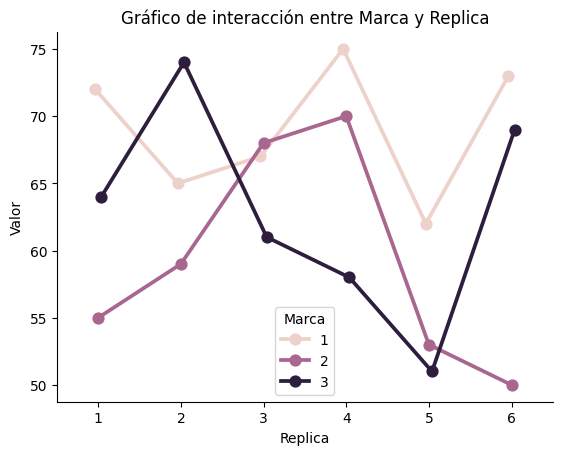

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



##Problema 2:
En una empresa lechera se tienen varios silos para almacenar leche (cisternas de 60 000 L). Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. Se sospecha que en algunos silos hay problemas, por ello, durante cinco días se decide registrar la temperatura a cierta hora crítica. Obviamente la temperatura de un día a otro es una fuente de variabilidad que podría impactar la variabilidad total.

| Silo | Lunes | Martes | Miércoles | Jueves | Viernes |
|------|-------|--------|-----------|--------|---------|
| A    | 4.0   | 4.0    | 5.0       | 0.5    | 3.0     |
| B    | 5.0   | 6.0    | 2.0       | 4.0    | 4.0     |
| C    | 4.5   | 4.0    | 3.5       | 2.0    | 3.0     |
| D    | 2.5   | 4.0    | 6.5       | 4.5    | 4.0     |
| E    | 4.0   | 4.0    | 3.5       | 2.0    | 4.0     |

**Preguntas:**<br>
a) En este problema, ¿cuál es el factor de tratamiento y cuál el factor de bloque?  
b) Suponga un DBCA, formule las hipótesis adecuadas y el modelo estadístico.  
c) ¿Hay diferencia entre los silos?  
d) ¿La temperatura de un día a otro es diferente?  
e) Revise residuos, ¿hay algún problema evidente?


In [4]:
import pandas as pd
from io import StringIO

data = '''
Silo,Día,Temperatura
A,Lunes,4.0
A,Martes,4.0
A,Miércoles,5.0
A,Jueves,0.5
A,Viernes,3.0
B,Lunes,5.0
B,Martes,6.0
B,Miércoles,2.0
B,Jueves,4.0
B,Viernes,4.0
C,Lunes,4.5
C,Martes,4.0
C,Miércoles,3.5
C,Jueves,2.0
C,Viernes,3.0
D,Lunes,2.5
D,Martes,4.0
D,Miércoles,6.5
D,Jueves,4.5
D,Viernes,4.0
E,Lunes,4.0
E,Martes,4.0
E,Miércoles,3.5
E,Jueves,2.0
E,Viernes,4.0
'''

df = pd.read_csv(StringIO(data))
df

,Silo,Día,Temperatura
0,A,Lunes,4.0
1,A,Martes,4.0
2,A,Miércoles,5.0
3,A,Jueves,0.5
4,A,Viernes,3.0
5,B,Lunes,5.0
6,B,Martes,6.0
7,B,Miércoles,2.0
8,B,Jueves,4.0
9,B,Viernes,4.0


# Diseño en bloques completamente al azar

In [5]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Día'    # La variable que no me interesa comparar
interes = 'Silo'      # La variable que me interesa comparar
respuesta = 'Temperatura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Silo),4.46,4.0,0.690402,0.609212
C(Día),9.76,4.0,1.510836,0.246022
Residual,25.84,16.0,NaN,NaN


# GRAFICO DE INTERACCION



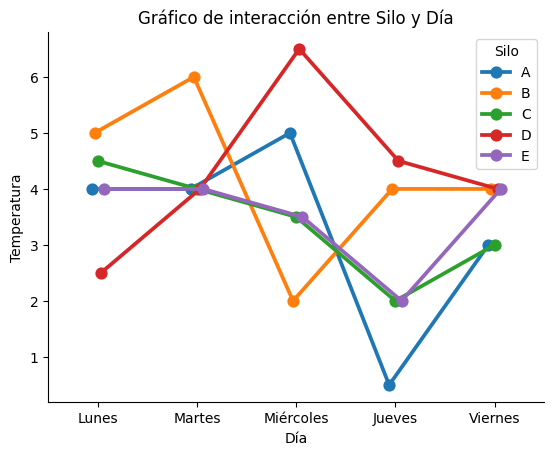

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 3
Se diseñó un experimento para estudiar el rendimiento de cuatro detergentes. Las siguientes lecturas de “blancura” se obtuvieron con un equipo especial diseñado para 12 cargas de lavado, distribuidas en tres modelos de lavadoras:

| Detergente | Lavadora 1 | Lavadora 2 | Lavadora 3 |
|------------|------------|------------|------------|
| A          | 45         | 43         | 51         |
| B          | 47         | 44         | 52         |
| C          | 50         | 49         | 57         |
| D          | 42         | 37         | 49         |

**Preguntas:**<br>
a) Señale el nombre del diseño experimental utilizado.  
b) Formule la hipótesis que se quiere probar en este problema.  
c) Realice el análisis estadístico más apropiado para estos datos y obtenga conclusiones.  



In [7]:
import pandas as pd
from io import StringIO

data = '''
Detergente,Lavadora,Lectura
A,1,45
A,2,43
A,3,51
B,1,47
B,2,44
B,3,52
C,1,50
C,2,49
C,3,57
D,1,42
D,2,37
D,3,49

'''

df = pd.read_csv(StringIO(data))
df

,Detergente,Lavadora,Lectura
0,A,1,45
1,A,2,43
2,A,3,51
3,B,1,47
4,B,2,44
5,B,3,52
6,C,1,50
7,C,2,49
8,C,3,57
9,D,1,42


# Diseño en bloques completamente al azar

In [8]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lavadora'    # La variable que no me interesa comparar
interes = 'Detergente'      # La variable que me interesa comparar
respuesta = 'Lectura'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Detergente),133.666667,3.0,34.127660,0.000363
C(Lavadora),170.166667,2.0,65.170213,0.000085
Residual,7.833333,6.0,NaN,NaN


# GRAFICO DE INTERACCION

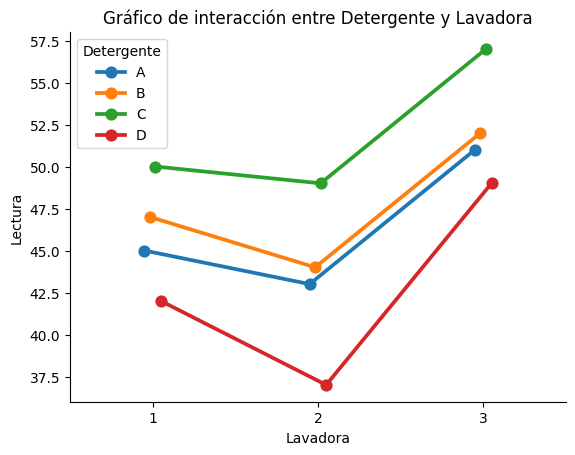

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 4
Con respecto al problema anterior:<br>
a) Conteste los tres incisos del problema anterior sin tomar en cuenta el efecto de las lavadoras y obtenga conclusiones.  
b) ¿Hay diferencias en las conclusiones anteriores y las del problema anterior? Explique su respuesta.  
c) ¿Con cuáles conclusiones se queda? Explique su respuesta.

# ANOVA DE UNA SOLA VIA

In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Lectura~ C(Detergente)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula
#

,df,sum_sq,mean_sq,F,PR(>F)
C(Detergente),3.0,133.666667,44.555556,2.002497,0.19229
Residual,8.0,178.000000,22.250000,NaN,NaN


## Problema 5
Una de las variables críticas en el proceso de ensamble del brazo lector de un disco duro es el ángulo que este forma con el cuerpo principal de la cabeza lectora. Se corre un experimento con el objetivo de comparar dos equipos que miden dicho ángulo en unidades de radianes. Se decide utilizar como factor de bloque a los operadores de los equipos. Los resultados se muestran en la siguiente tabla:

| Operador | Equipo 1                                         | Equipo 2                                         |
|----------|--------------------------------------------------|--------------------------------------------------|
| 1        | 1.328, 0.985, 1.316, 1.553, 1.310               | 1.273, 0.985, 1.134, 1.412, 0.917               |
|          | 1.113, 1.057, 1.144, 1.485, 1.386               | 0.789, 0.671, 0.554, 1.386, 1.289               |
| 2        | 1.269, 1.268, 1.091, 1.195, 1.380               | 1.036, 0.783, 1.108, 1.129, 1.132               |
|          | 1.093, 0.984, 1.087, 1.482, 1.442               | 0.201, 0.900, 0.916, 1.434, 1.223               |
| 3        | 1.440, 1.079, 1.389, 1.611, 1.445               | 1.454, 1.063, 1.219, 1.602, 1.583               |
|          | 1.150, 1.190, 1.247, 1.617, 1.574               | 1.018, 1.050, 0.997, 1.538, 1.478               |

### Preguntas y ejercicios:
a) Plantee el modelo y las hipótesis más adecuadas al problema.  
b) ¿Existen diferencias entre los equipos? Argumente estadísticamente.  
c) ¿Existen diferencias entre los operadores?  
d) Dibuje los diagramas de cajas simultáneos y las gráficas de medias para ambos factores, después interprételas.  
e) Verifique los supuestos de normalidad e igualdad de varianza entre tratamientos, así como la posible presencia de puntos aberrantes.


In [11]:
import pandas as pd
from io import StringIO

data = '''
Operador,Equipo,Angulo
1,1,1.328
1,2,1.113
1,3,1.440
1,4,1.1
1,5,1.380
2,1,0.985
2,2,1.057
2,3,1.079
2,4,1.087
2,5,1.268
3,1,1.316
3,2,1.144
3,3,1.389
3,4,1.247
3,5,1.091
4,1,1.553
4,2,1.485
4,3,1.611
4,4,1.482
4,5,1.195


'''

df = pd.read_csv(StringIO(data))
df

,Operador,Equipo,Angulo
0,1,1,1.328
1,1,2,1.113
2,1,3,1.440
3,1,4,1.100
4,1,5,1.380
5,2,1,0.985
6,2,2,1.057
7,2,3,1.079
8,2,4,1.087
9,2,5,1.268


# Diseño en bloques completamente al azar

In [12]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Operador'    # La variable que no me interesa comparar
interes = 'Equipo'      # La variable que me interesa comparar
respuesta = 'Angulo'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: No hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Equipo),0.082449,4.0,1.117757,0.393099
C(Operador),0.348503,3.0,6.299485,0.008214
Residual,0.221290,12.0,NaN,NaN


# GRAFICO DE INTERACCION

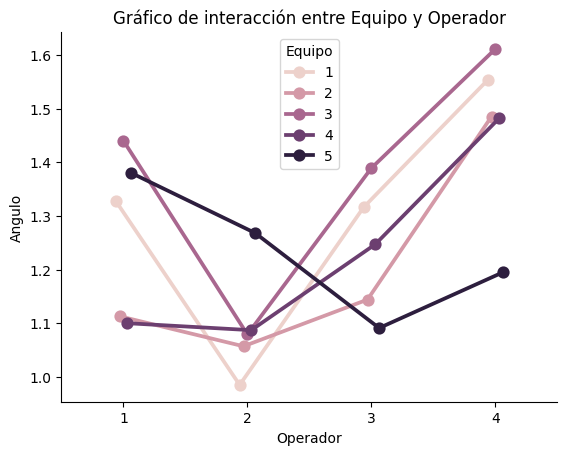

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 6
Un aspecto crítico para que se conserve la leche es la temperatura de almacenamiento. De manera tradicional se han usado termómetros de mercurio (Mer) para verificar que la temperatura sea la adecuada, pero ahora se han comprado termómetros electrónicos (Rtd) para facilitar el proceso de medición. Sin embargo, se duda de las mediciones de estos nuevos dispositivos. Para aclarar dudas y diagnosticar la situación, durante cinco días se toman mediciones con ambos tipos de termómetros en varios silos (a la misma hora). Los datos para cinco silos se muestran a continuación:

| Silo | Día 1 (Mer) | Día 1 (Rtd) | Día 2 (Mer) | Día 2 (Rtd) | Día 3 (Mer) | Día 3 (Rtd) | Día 4 (Mer) | Día 4 (Rtd) | Día 5 (Mer) | Día 5 (Rtd) |
|------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|--|
| A    | 4.0         | 2.6         | 4.0         | 2.8         | 5.0         | 5.0         | 0.5         | 0.0         | 3.0         | 2.4         |
| B    | 5.0         | 6.4         | 6.0         | 6.4         | 2.0         | 2.3         | 4.0         | 4.2         | 4.0         | 4.0         |
| C    | 4.5         | 3.3         | 4.0         | 1.4         | 3.5         | 1.8         | 2.0         | -1.9        | 3.0         | -7.6        |
| D    | 2.5         | 3.1         | 4.0         | 5.0         | 6.5         | 6.6         | 4.5         | 2.7         | 4.0         | 4.0         |
| E    | 4.0         | 0.0         | 4.0         | 3.5         | 0.6         | 2.0         | -4.0        | -4.0        | -4.0        | -6.3        |

**Preguntas:**<br>
a) Observe los datos y establezca una conjetura acerca de la confiabilidad de las mediciones con Rtd (del termómetro de mercurio no hay duda).  
b) Es claro que el silo se puede ver como tratamiento y día como bloque. Considere sólo los datos de Rtd y establezca el modelo estadístico. También haga el ANOVA correspondiente y obtenga conclusiones.  
c) Repita el inciso anterior pero ahora para las mediciones Mer.  
d) ¿Las conclusiones obtenidas en los incisos anteriores coinciden? Comente su respuesta.  
e) Datos pareados. Para comparar los dos métodos de medición (Mer y Rtd) obtenga como variable de respuesta la diferencia de temperatura que registran los métodos para cada día en cada silo. Considerando esto, establezca el modelo estadístico, haga el ANOVA correspondiente y obtenga conclusiones.


In [14]:
import pandas as pd
from io import StringIO

data = '''
Silo,Día,Temperatura,Tipo
A,1,4.0,Mer
A,1,2.6,Rtd
A,2,4.0,Mer
A,2,2.8,Rtd
A,3,5.0,Mer
A,3,5.0,Rtd
A,4,0.5,Mer
A,4,0.0,Rtd
A,5,3.0,Mer
A,5,2.4,Rtd
B,1,5.0,Mer
B,1,6.4,Rtd
B,2,6.0,Mer
B,2,6.4,Rtd
B,3,2.0,Mer
B,3,2.3,Rtd
B,4,4.0,Mer
B,4,4.2,Rtd
B,5,4.0,Mer
B,5,4.0,Rtd
C,1,4.5,Mer
C,1,3.3,Rtd
C,2,4.0,Mer
C,2,1.4,Rtd
C,3,4.0,Mer
C,3,1.4,Rtd
C,4,3.5,Mer
C,4,1.8,Rtd
C,5,3.0,Mer
C,5,-7.6,Rtd
D,1,2.5,Mer
D,1,3.1,Rtd
D,2,4.0,Mer
D,2,5.0,Rtd
D,3,4.0,Mer
D,3,6.5,Rtd
D,4,4.5,Mer
D,4,2.7,Rtd
D,5,4.0,Mer
D,5,4.0,Rtd
E,1,4.0,Mer
E,1,0.0,Rtd
E,2,4.0,Mer
E,2,3.5,Rtd
E,3,0.6,Mer
E,3,2.0,Rtd
E,4,-4.0,Mer
E,4,-4.0,Rtd
E,5,-4.0,Mer
E,5,-6.3,Rtd

'''

df = pd.read_csv(StringIO(data))
df

,Silo,Día,Temperatura,Tipo
0,A,1,4.0,Mer
1,A,1,2.6,Rtd
2,A,2,4.0,Mer
3,A,2,2.8,Rtd
4,A,3,5.0,Mer
5,A,3,5.0,Rtd
6,A,4,0.5,Mer
7,A,4,0.0,Rtd
8,A,5,3.0,Mer
9,A,5,2.4,Rtd


# Diseño en cuadro latino

In [15]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Silo'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Tipo'       # Variable de interés (tratamiento)
respuesta = 'Temperatura'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:
            sum_sq    df         F    PR(>F)
C(Tipo)    10.7648   1.0  2.102652  0.154840
C(Silo)   150.7000   4.0  7.358930  0.000154
C(Día)     90.6500   4.0  4.426589  0.004680
Residual  204.7852  40.0       NaN       NaN

Conclusión: No hay diferencias significativas: Tipo.
Conclusión: Hay diferencias significativas: Silo.
Conclusión: Hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Tipo),10.7648,1.0,2.102652,0.154840
C(Silo),150.7000,4.0,7.358930,0.000154
C(Día),90.6500,4.0,4.426589,0.004680
Residual,204.7852,40.0,NaN,NaN


## Problema 7
Se quiere estudiar el efecto de cinco diferentes catalizadores (**A, B, C, D y E**) sobre el **tiempo de reacción** de un proceso químico. Cada lote de material sólo permite cinco corridas y cada corrida requiere aproximadamente 1.5 horas, por lo que sólo se pueden realizar cinco corridas diarias. El experimentador decide correr los experimentos con un diseño en cuadro latino para controlar activamente a los **lotes y días**. Los datos obtenidos son:

| Lote | Día 1 | Día 2 | Día 3 | Día 4 | Día 5 |
|------|-------|-------|-------|-------|-------|
| 1    | A = 8 | B = 7 | D = 1 | C = 7 | E = 3 |
| 2    | C = 11| E = 2 | A = 7 | D = 3 | B = 8 |
| 3    | B = 4 | A = 9 | C = 10| E = 1 | D = 5 |
| 4    | D = 6 | C = 8 | E = 6 | B = 6 | A = 10|
| 5    | E = 4 | D = 2 | B = 3 | A = 8 | C = 8 |


**Preguntas:**<br>
a) ¿Cómo se aleatorizó el experimento?  
b) Anote la ecuación del modelo y las hipótesis estadísticas correspondientes.  
c) ¿Existen diferencias entre los tratamientos? ¿Cuáles tratamientos son diferentes entre sí?  
d) ¿Los factores de ruido, lote y día afectan el tiempo de reacción del proceso?  
e) Dibuje los gráficos de medias para los tratamientos, los lotes y los días. ¿Cuál tratamiento es mejor?  
f) Verifique los supuestos del modelo, considerando que los datos se obtuvieron columna por columna, día a día.


In [16]:
import pandas as pd
from io import StringIO

data = '''
Lote,Día,Tiempo,Catalizador
1,1,A,8
1,2,B,7
1,3,D,1
1,4,C,7
1,5,E,3
2,1,C,11
2,2,E,2
2,3,A,7
2,4,D,3
2,5,B,8
3,1,B,4
3,2,A,9
3,3,C,10
3,4,E,1
3,5,D,5
4,1,D,6
4,2,C,8
4,3,E,6
4,4,B,6
4,5,A,10
5,1,E,4
5,2,D,2
5,3,B,3
5,4,A,8
5,5,C,8

'''

df = pd.read_csv(StringIO(data))
df

,Lote,Día,Tiempo,Catalizador
0,1,1,A,8
1,1,2,B,7
2,1,3,D,1
3,1,4,C,7
4,1,5,E,3
5,2,1,C,11
6,2,2,E,2
7,2,3,A,7
8,2,4,D,3
9,2,5,B,8


# Diseño en cuadro latino

In [17]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Lote'   # Primer bloque (factor no principal)
bloque_2 = 'Día'      # Segundo bloque (factor no principal)
interes = 'Tiempo'       # Variable de interés (tratamiento)
respuesta = 'Catalizador'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:
           sum_sq    df          F    PR(>F)
C(Tiempo)  141.44   4.0  11.309168  0.000488
C(Lote)     15.44   4.0   1.234542  0.347618
C(Día)      12.24   4.0   0.978678  0.455014
Residual    37.52  12.0        NaN       NaN

Conclusión: Hay diferencias significativas: Tiempo.
Conclusión: No hay diferencias significativas: Lote.
Conclusión: No hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Tiempo),141.44,4.0,11.309168,0.000488
C(Lote),15.44,4.0,1.234542,0.347618
C(Día),12.24,4.0,0.978678,0.455014
Residual,37.52,12.0,NaN,NaN


## Problema 8
En el problema anterior elimine el factor de bloque días, y conteste:

a) ¿Se justifica la eliminación?  
b) Sin tomar en cuenta el día, señale el nombre del diseño, el modelo y las hipótesis más adecuadas al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error, en este caso con el del problema anterior. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y del anterior?


# Diseño en bloques completamente al azar

In [18]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Lote'    # La variable que no me interesa comparar
interes = 'Tiempo'      # La variable que me interesa comparar
respuesta = 'Catalizador'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: No hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Tiempo),141.44,4.0,11.369775,0.000146
C(Lote),15.44,4.0,1.241158,0.333144
Residual,49.76,16.0,NaN,NaN


## Problema 9
Con respecto a los problemas 7 y 8, además de eliminar el factor día ahora elimine el factor lote, y conteste lo siguiente:

a) ¿Se justifica esta segunda eliminación en ambos problemas?  
b) Después de la doble eliminación, señale el nombre del diseño, el modelo y la(s) hipótesis más adecuada(s) al problema.  
c) Pruebe las hipótesis y obtenga conclusiones.  
d) Compare el cuadro medio del error obtenido con los de los problemas 16 y 17. ¿Qué observa? ¿Cómo lo explica?  
e) ¿Por qué se obtienen las mismas conclusiones en los tratamientos de este problema y de los dos anteriores?  
f) ¿Cree que esta eliminación hubiese afectado si los factores de bloque hubieran sido significativos?  


# ANOVA DE UNA SOLA VIA

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

modelo=smf.ols('Catalizador~ C(Lote)',data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo)
tabla_anova

#No se rechaza la hipotesis nula
#

,df,sum_sq,mean_sq,F,PR(>F)
C(Lote),4.0,15.44,3.86,0.403766,0.803667
Residual,20.0,191.20,9.56,NaN,NaN


## Problema 10
Se comprueba el peso en gramos de un material de tres proveedores: **A, B y C**, por tres diferentes inspectores: **I, II y III**, utilizando tres diferentes escalas: **1, 2 y 3**. El experimento se lleva a cabo como el siguiente cuadro latino:

| Inspector | Escala 1 | Escala 2 | Escala 3 |
|-----------|----------|----------|----------|
| I         | A = 16   | B = 10   | C = 11   |
| II        | B = 15   | C = 9    | A = 14   |
| III       | C = 13   | A = 11   | B = 13   |

**Preguntas:**<br>
a) ¿Hay diferencias entre los proveedores?  
b) ¿Hay diferencias entre los inspectores y entre las escalas?  
c) Si el peso debe ser 15 g, ¿cuál proveedor es mejor?  
d) Si algún factor de bloque es no significativo, elimínelo y haga el análisis adecuado.  


In [20]:
import pandas as pd
from io import StringIO

data = '''
Inspector,Escala,Peso,Proveedor
I,1,A,16
I,2,B,10
I,3,C,11
II,1,B,15
II,2,C,9
II,3,A,14
III,1,C,13
III,2,A,11
III,3,B,13


'''

df = pd.read_csv(StringIO(data))
df

,Inspector,Escala,Peso,Proveedor
0,I,1,A,16
1,I,2,B,10
2,I,3,C,11
3,II,1,B,15
4,II,2,C,9
5,II,3,A,14
6,III,1,C,13
7,III,2,A,11
8,III,3,B,13


# Diseño en cuadro latino

In [21]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Inspector'   # Primer bloque (factor no principal)
bloque_2 = 'Escala'      # Segundo bloque (factor no principal)
interes = 'Peso'       # Variable de interés (tratamiento)
respuesta = 'Proveedor'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:
                 sum_sq   df      F    PR(>F)
C(Peso)       10.888889  2.0   49.0  0.020000
C(Inspector)   0.222222  2.0    1.0  0.500000
C(Escala)     32.888889  2.0  148.0  0.006711
Residual       0.222222  2.0    NaN       NaN

Conclusión: Hay diferencias significativas: Peso.
Conclusión: No hay diferencias significativas: Inspector.
Conclusión: Hay diferencias significativas: Escala.


,sum_sq,df,F,PR(>F)
C(Peso),10.888889,2.0,49.0,0.020000
C(Inspector),0.222222,2.0,1.0,0.500000
C(Escala),32.888889,2.0,148.0,0.006711
Residual,0.222222,2.0,NaN,NaN


## Problema 11
Cuando se comparan varios fertilizantes o diferentes variedades de cierto cultivo, es típico que se deba considerar el gradiente de fertilidad del suelo (factor columna) o los efectos residuales de cultivos previos (factor renglón). Considerando estos factores de bloque, Gomez y Gomez (1984) plantean un experimento en cuadro latino para comparar, en cuanto a rendimiento en toneladas por hectárea, tres variedades de maíz híbrido (**A, B, C**) y una variedad control (**D**). Para ello, se utiliza un campo agrícola cuadrado de 16 hectáreas, dividido en parcelas de una hectárea. Los datos de rendimiento obtenidos en cada parcela se muestran a continuación:

| Ren\Col | 1       | 2       | 3       | 4       |
|---------|---------|---------|---------|---------|
| 1       | 1.640(B)| 1.210(D)| 1.425(C)| 1.345(A)|
| 2       | 1.475(C)| 1.185(A)| 1.400(D)| 1.290(B)|
| 3       | 1.670(A)| 0.710(C)| 1.665(B)| 1.180(D)|
| 4       | 1.565(D)| 1.290(B)| 1.655(A)| 0.660(C)|

**Preguntas y ejercicios:**<br>
a) ¿Existen diferencias en los rendimientos de las diferentes variedades de maíz?  
b) ¿Cuál de los factores de bloque tuvo efectos?  
c) ¿Se habrían detectado las mismas diferencias en los tratamientos con un diseño completamente al azar?  
d) ¿Y con un diseño en bloques completos al azar?  


In [22]:
import pandas as pd
from io import StringIO

data = '''
Ren,Col,Rendimiento,Variedad
1,1,A,1.640
1,2,B,1.210
1,3,D,1.425
1,4,C,1.345
2,1,C,1.475
2,2,A,1.185
2,3,D,1.400
2,4,B,1.290
3,1,A,1.670
3,2,C,0.710
3,3,B,1.665
3,4,D,1.180
4,1,D,1.565
4,2,B,1.290
4,3,A,1.655
4,4,C,0.660



'''

df = pd.read_csv(StringIO(data))
df

,Ren,Col,Rendimiento,Variedad
0,1,1,A,1.640
1,1,2,B,1.210
2,1,3,D,1.425
3,1,4,C,1.345
4,2,1,C,1.475
5,2,2,A,1.185
6,2,3,D,1.400
7,2,4,B,1.290
8,3,1,A,1.670
9,3,2,C,0.710


# Diseño en cuadro latino

In [23]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Ren'   # Primer bloque (factor no principal)
bloque_2 = 'Col'      # Segundo bloque (factor no principal)
interes = 'Rendimiento'       # Variable de interés (tratamiento)
respuesta = 'Variedad'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
print(tabla_anova)
# print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:
                  sum_sq   df         F    PR(>F)
C(Rendimiento)  0.303841  3.0  2.405843  0.165824
C(Ren)          0.030155  3.0  0.238768  0.866379
C(Col)          0.620003  3.0  4.909251  0.046917
Residual        0.252586  6.0       NaN       NaN

Conclusión: No hay diferencias significativas: Rendimiento.
Conclusión: No hay diferencias significativas: Ren.
Conclusión: Hay diferencias significativas: Col.


,sum_sq,df,F,PR(>F)
C(Rendimiento),0.303841,3.0,2.405843,0.165824
C(Ren),0.030155,3.0,0.238768,0.866379
C(Col),0.620003,3.0,4.909251,0.046917
Residual,0.252586,6.0,NaN,NaN


## Problema 12
Se quieren comparar tres dietas (**A, B, C**) a base de proteínas de origen vegetal utilizando 18 ratas de laboratorio de una misma camada. Primero se observa por un tiempo el apetito para formar tres grupos de seis ratas, según su voracidad; y cada uno de estos grupos se clasifica a su vez en tres grupos de dos ratas, de acuerdo a su peso inicial. Se plantea un experimento donde la variable de respuesta es el peso en gramos ganado por las ratas después de cierto periodo, con los siguientes resultados:

| Apetito/peso inicial | A1        | A2        | A3        |
|-----------------------|-----------|-----------|-----------|
| P1                   | 67 (C)    | 105 (A)   | 95 (B)    |
|                       | 72        | 112       | 86        |
| P2                   | 85 (A)    | 75 (B)    | 88 (C)    |
|                       | 98        | 67        | 110       |
| P3                   | 66 (B)    | 68 (C)    | 108 (A)   |
|                       | 47        | 91        | 120       |

### Preguntas:
a) Analice los datos. ¿Cuáles de los factores influyen en el peso ganado por las ratas?  
b) ¿Cuál dieta es mejor?  
c) ¿Alguno de los factores de bloque puede ser ignorado? Argumente su respuesta.  
d) Si ese fuera el caso, analice de nuevo el experimento y saque conclusiones.  
e) Verifique los supuestos del modelo.  


In [24]:
import pandas as pd
from io import StringIO

data = '''
Apetito,Peso_inicial,Rendimiento,Dieta
A1,67,72,C
A2,105,112,A
A3,95,86,B
A1,85,98,A
A2,75,67,B
A3,88,110,C
A1,66,47,B
A2,68,91,C
A3,108,120,A



'''

df = pd.read_csv(StringIO(data))
df

,Apetito,Peso_inicial,Rendimiento,Dieta
0,A1,67,72,C
1,A2,105,112,A
2,A3,95,86,B
3,A1,85,98,A
4,A2,75,67,B
5,A3,88,110,C
6,A1,66,47,B
7,A2,68,91,C
8,A3,108,120,A


# Diseño en bloques completamente al azar

In [25]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

nivel_de_significancia = 0.05

bloques = 'Apetito'    # La variable que no me interesa comparar #categorica
interes = 'Dieta'      # La variable que me interesa comparar #categorica
respuesta = 'Rendimiento'     # La medición que me permite hacer la comparación

# NO MODIFICAR de esta línea hacia abajo
# Realizar el modelo ANOVA de dos vías
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloques})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA:")
# print(tabla_anova) #

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print("\nConclusión: Hay diferencias significativas entre los tratamientos.")
else:
    print("\nConclusión: No hay diferencias significativas entre los tratamientos.")

if tabla_anova["PR(>F)"][f"C({bloques})"] < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre los bloques.")
else:
    print("Conclusión: No hay diferencias significativas entre los bloques.")
tabla_anova

Resultados del ANOVA:

Conclusión: Hay diferencias significativas entre los tratamientos.
Conclusión: Hay diferencias significativas entre los bloques.


,sum_sq,df,F,PR(>F)
C(Dieta),2830.888889,2.0,59.948235,0.001042
C(Apetito),1636.222222,2.0,34.649412,0.002978
Residual,94.444444,4.0,NaN,NaN


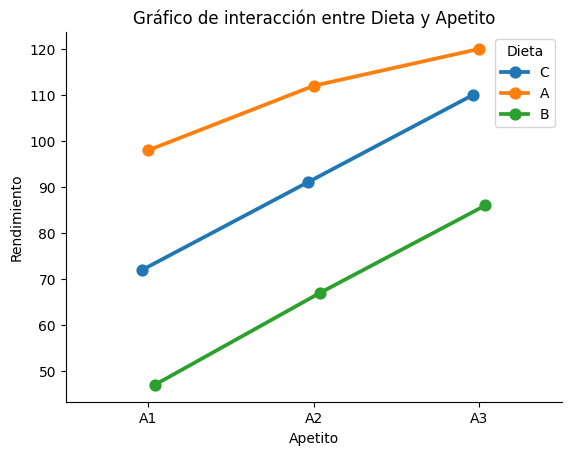

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un gráfico de interacción
sns.pointplot(x=bloques, y=respuesta, hue=interes, data=df, dodge=True)
plt.title(f"Gráfico de interacción entre {interes} y {bloques}")
plt.xlabel(bloques)
plt.ylabel(respuesta)
plt.legend(title=interes)
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.show()



## Problema 13
Una compañía distribuidora ubicada en los suburbios está interesada en estudiar la diferencia en costos (tiempo y gasolina) entre las cuatro rutas (**A, B, C, D**) que llevan a la zona comercial, más importante para ellos, en el otro extremo de la ciudad. Deciden correr un experimento en cuadro grecolatino controlando los factores de bloque **chofer**, marca de vehículo (**α, β, χ, δ**) y día de la semana. El experimento se repite en dos semanas diferentes, en las cuales no hay días festivos ni quincenas. Los costos observados en pesos se muestran en la siguiente tabla:

| Chofer/día | Lunes       | Martes      | Miércoles   | Jueves      |
|------------|-------------|-------------|-------------|-------------|
| Carlos     | 825(D, α)   | 585(C, χ)   | 550(B, β)   | 580(A, δ)   |
|            | 750         | 610         | 580         | 650         |
| Enrique    | 650(A, χ)   | 540(B, α)   | 580(C, χ)   | 850(D, β)   |
|            | 725         | 560         | 635         | 770         |
| Genaro     | 700(C, β)   | 650(D, δ)   | 635(A, α)   | 450(B, χ)   |
|            | 675         | 740         | 540         | 550         |
| Luis       | 475(B, δ)   | 560(A, β)   | 650(D, α)   | 670(C, α)   |
|            | 480         | 615         | 725         | 730         |

### Preguntas:
a) Haga el análisis de varianza de este experimento.  
b) Realice las pruebas de comparaciones múltiples para los factores significativos.  
c) Represente los tratamientos y factores de bloque usando gráficas de medias y diagramas de dispersión.  
d) ¿Cuál es la mejor ruta? ¿Cuál es la peor?  
e) ¿Hay diferencias significativas entre los choferes? ¿Y entre el tipo o marca de unidad?  
f) ¿Cuáles factores de bloque valió la pena tomar en cuenta en el experimento?  
g) ¿Por qué se evitaron días festivos y quincenas en el experimento? ¿Cuáles otros aspectos se tenían que tomar en cuenta?  
h) Verifique los supuestos del modelo.  


In [27]:
import pandas as pd
from io import StringIO

data = '''
Chofer,Día,Ruta,Marca,Costo,Tiempo
Carlos,Lunes,(D, α),825,750
Carlos,Martes,(C, χ),585,610
Carlos,Miércoles,(B, β),550,580
Carlos,Jueves,(A, δ),580,650
Enrique,Lunes,(A, χ),650,725
Enrique,Martes,(B, α),540,560
Enrique,Miércoles,(C, χ),580,635
Enrique,Jueves,(D, β),850,770
Genaro,Lunes,(C, β),700,675
Genaro,Martes,(D, δ),650,740
Genaro,Miércoles,(A, α),635,540
Genaro,Jueves,(B, χ),450,550
Luis,Lunes,(B, δ),475,480
Luis,Martes,(A, β),560,615
Luis,Miércoles,(D, α),650,725
Luis,Jueves,(C, α),670,730



'''

df = pd.read_csv(StringIO(data))
df

,Chofer,Día,Ruta,Marca,Costo,Tiempo
0,Carlos,Lunes,(D,α),825,750
1,Carlos,Martes,(C,χ),585,610
2,Carlos,Miércoles,(B,β),550,580
3,Carlos,Jueves,(A,δ),580,650
4,Enrique,Lunes,(A,χ),650,725
5,Enrique,Martes,(B,α),540,560
6,Enrique,Miércoles,(C,χ),580,635
7,Enrique,Jueves,(D,β),850,770
8,Genaro,Lunes,(C,β),700,675
9,Genaro,Martes,(D,δ),650,740


In [28]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Chofer'   # Primer bloque (factor no principal)
bloque_2 = 'Marca'      # Segundo bloque (factor no principal)
bloque_3 = 'Día'      # Tercer bloque (factor no principal)
interes = 'Ruta'       # Variable de interés (tratamiento)
respuesta = 'Tiempo'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:

Conclusión: No hay diferencias significativas: Ruta.
Conclusión: No hay diferencias significativas: Chofer.
Conclusión: No hay diferencias significativas: Marca.
Conclusión: No hay diferencias significativas: Día.


,sum_sq,df,F,PR(>F)
C(Ruta),78695.299343,3.0,4.212933,0.134122
C(Chofer),3269.573897,3.0,0.175036,0.906882
C(Marca),1879.916159,3.0,0.100641,0.954370
C(Día),8231.659818,3.0,0.440680,0.740800
Residual,18679.458841,3.0,NaN,NaN


## Problema 14
23. Un investigador está interesado en el efecto del porcentaje de lisina y del porcentaje de proteína en la producción de vacas lecheras. Se consideran siete niveles en cada factor:

- **% de lisina**: 0.0 (**A**), 0.1 (**B**), 0.2 (**C**), 0.3 (**D**), 0.4 (**E**), 0.5 (**F**), 0.6 (**G**).  
- **% de proteína**: 2 (**α**), 4 (**β**), 6 (**χ**), 8 (**δ**), 10 (**ε**), 12 (**φ**), 14 (**γ**).  

Para el estudio, se seleccionaron siete vacas al azar, a las cuales se les da un seguimiento de siete periodos de tres meses. Los datos en galones de leche fueron los siguientes:

| Vaca/periodo | 1       | 2       | 3       | 4       | 5       | 6       | 7       |
|--------------|---------|---------|---------|---------|---------|---------|---------|
| 1            | 304 (Aα)| 436 (Bε)| 350 (Cβ)| 504 (Dφ)| 417 (Eχ)| 519 (Fγ)| 432 (Gδ)|
| 2            | 381 (Bβ)| 505 (Cφ)| 425 (Dχ)| 564 (Eγ)| 487 (Fα)| 536 (Gε)| 483 (Aχ)|
| 3            | 432 (Cχ)| 566 (Dγ)| 479 (Eε)| 357 (Fα)| 466 (Gβ)| 465 (Aφ)| 507 (Bγ)|
| 4            | 442 (Dδ)| 372 (Eχ)| 536 (Fε)| 366 (Gβ)| 495 (Aχ)| 425 (Bφ)| 507 (Cγ)|
| 5            | 496 (Eε)| 449 (Fβ)| 493 (Gφ)| 345 (Aχ)| 509 (Bγ)| 481 (Cδ)| 380 (Dα)|
| 6            | 534 (Fφ)| 421 (Gχ)| 352 (Aγ)| 427 (Bδ)| 346 (Cχ)| 478 (Dε)| 397 (Eβ)|
| 7            | 543 (Gγ)| 386 (Aδ)| 435 (Bα)| 485 (Cε)| 406 (Dφ)| 554 (Eφ)| 410 (Fχ)|

### Preguntas y ejercicios:
a) Analice este experimento. ¿Qué factores tienen efecto en la producción de leche?  
b) Interprete los resultados usando gráficos de medias.  
c) ¿Cómo puede explicar la falta de efectos en vacas y periodo?  
d) ¿Qué porcentajes de lisina y proteína dan los mejores resultados?  
e) Verifique los supuestos del modelo.  


In [32]:
import pandas as pd
from io import StringIO

data = '''
Vaca,Periodo,Lisina,Proteina,Leche
1,1, (A,α),304
1,2, (B,ε),436
1,3, (C,β),350
1,4, (D,φ),504
1,5, (E,χ),417
1,6, (F,γ),519
1,7, (G,δ),432
2,1, (B,β),381
2,2, (C,φ),505
2,3, (D,χ),425
2,4, (E,γ),564
2,5, (F,α),487
2,6, (G,ε),536
2,7, (A,χ),483
3,1, (C,χ),432
3,2, (D,γ),566
3,3, (E,ε),479
3,4, (F,α),357
3,5, (G,β),466
3,6, (A,φ),465
3,7, (B,γ),507
4,1, (D,δ),442
4,2, (E,χ),372
4,3, (F,ε),536
4,4, (G,β),366
4,5, (A,χ),495
4,6, (B,φ),425
4,7, (C,γ),507
5,1, (E,ε),496
5,2, (F,β),449
5,3, (G,φ),493
5,4, (A,χ),345
5,5, (B,γ),509
5,6, (C,δ),481
5,7, (D,α),380
6,1, (F,φ),534
6,2, (G,χ),421
6,3, (A,γ),352
6,4, (B,δ),427
6,5, (C,χ),346
6,6, (D,ε),478
6,7, (E,β),397
7,1, (G,γ),543
7,2, (A,δ),386
7,3, (B,α),435
7,4, (C,ε),485
7,5, (D,φ),406
7,6, (E,φ),554
7,7, (F,χ),410





'''

df = pd.read_csv(StringIO(data))
df

,Vaca,Periodo,Lisina,Proteina,Leche
0,1,1,(A,α),304
1,1,2,(B,ε),436
2,1,3,(C,β),350
3,1,4,(D,φ),504
4,1,5,(E,χ),417
5,1,6,(F,γ),519
6,1,7,(G,δ),432
7,2,1,(B,β),381
8,2,2,(C,φ),505
9,2,3,(D,χ),425


In [33]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
bloque_3 = 'Lisina'      # Tercer bloque (factor no principal)
interes = 'Proteina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:

Conclusión: Hay diferencias significativas: Proteina.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: No hay diferencias significativas: Lisina.


,sum_sq,df,F,PR(>F)
C(Proteina),81658.082957,6.0,4.694560,0.002717
C(Vaca),22265.466411,6.0,1.280052,0.303492
C(Periodo),4518.955264,6.0,0.259797,0.950234
C(Lisina),19815.528269,6.0,1.139204,0.370349
Residual,69576.774186,24.0,NaN,NaN


In [34]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import pandas as pd

# Nivel de significancia
nivel_de_significancia = 0.05

# Configuración de variables
bloque_1 = 'Vaca'   # Primer bloque (factor no principal)
bloque_2 = 'Periodo'      # Segundo bloque (factor no principal)
bloque_3 = 'Proteina'      # Tercer bloque (factor no principal)
interes = 'Lisina'       # Variable de interés (tratamiento)
respuesta = 'Leche'  # Variable de respuesta (medición) que permite la comparación

# De aquí para abajo, no mover
# Crear el modelo ANOVA para un cuadro latino
modelo = ols(f'{respuesta} ~ C({interes}) + C({bloque_1}) + C({bloque_2}) + C({bloque_3})', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo, typ=2)

# Mostrar resultados
print("Resultados del ANOVA para el Cuadro Latino:")
# print(tabla_anova) print(tabla_anova)

# Interpretar resultados
if tabla_anova["PR(>F)"][f"C({interes})"] < nivel_de_significancia:
    print(f"\nConclusión: Hay diferencias significativas: {interes}.")
else:
    print(f"\nConclusión: No hay diferencias significativas: {interes}.")

if tabla_anova["PR(>F)"][f"C({bloque_1})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_1}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_1}.")

if tabla_anova["PR(>F)"][f"C({bloque_2})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_2}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_2}.")

if tabla_anova["PR(>F)"][f"C({bloque_3})"] < nivel_de_significancia:
    print(f"Conclusión: Hay diferencias significativas: {bloque_3}.")
else:
    print(f"Conclusión: No hay diferencias significativas: {bloque_3}.")
tabla_anova

Resultados del ANOVA para el Cuadro Latino:

Conclusión: No hay diferencias significativas: Lisina.
Conclusión: No hay diferencias significativas: Vaca.
Conclusión: No hay diferencias significativas: Periodo.
Conclusión: Hay diferencias significativas: Proteina.


,sum_sq,df,F,PR(>F)
C(Lisina),19815.528269,6.0,1.139204,0.370349
C(Vaca),22265.466411,6.0,1.280052,0.303492
C(Periodo),4518.955264,6.0,0.259797,0.950234
C(Proteina),81658.082957,6.0,4.694560,0.002717
Residual,69576.774186,24.0,NaN,NaN
